<a href="https://colab.research.google.com/github/BryanAyalaL/Metodos-numericos/blob/main/metodos_numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase n3**

# Bisección

In [ ]:
import math
import pandas as pd

# Método de bisección
def biseccion(f, a, b, tol=1.0e-4):
    fa = f(a)
    if fa == 0.0:
        return a
    fb = f(b)
    if fb == 0.0:
        return b
    if fa*fb>0:
        raise ValueError('La raíz no está en el intervalo')

    izq_lista=[]
    der_lista=[]
    xm_lista=[]
    func_izq_lista=[]
    func_der_lista=[]
    func_xm_lista=[]

    errores_lista=[]

    # primera iteración
    xm = (a + b)/2
    xm_ant=xm
    fxm = f(xm)

    izq_lista.append(a)
    der_lista.append(b)
    xm_lista.append(xm)
    func_izq_lista.append(fa)
    func_der_lista.append(fb)
    func_xm_lista.append(fxm)


    if fxm == 0.0:
        return xm  # Se encontró la raíz exacta

    # Verificar en qué subintervalo está la raíz si en el izquierdo o en el derecho
    if fa*fxm<0:
        a = a
        b = xm
        fa=f(a)
        fb=f(b)
    else:
        a = xm
        b = b
        fa=f(a)
        fb=f(b)

    #creo variables auxiliares
    error=1
    iteraciones=2

    errores_lista.append(error)

    # Proceso iterativo
    while error>tol:
        xm = (a + b)/2
        fxm = f(xm)

        if fxm == 0.0:
            return xm  # Se encontró la raíz exacta

        # Verificar en qué subintervalo está la raíz si en el izquierdo o en el derecho
        if fa*fxm<0:
          a = a
          b = xm
          fa=f(a)
          fb=f(b)
        else:
          a = xm
          b = b
          fa=f(a)
          fb=f(b)

        error=abs(xm-xm_ant)
        xm_ant=xm


        #actualizar las listas
        izq_lista.append(a)
        der_lista.append(b)
        xm_lista.append(xm)
        func_izq_lista.append(fa)
        func_der_lista.append(fb)
        func_xm_lista.append(fxm)

        errores_lista.append(error)

        iteraciones=iteraciones+1
    # Retornar la aproximación final
    datos=pd.DataFrame({
    'a': izq_lista,
    'b': der_lista,
    'xm': xm_lista,
    'f(a)': func_izq_lista,
    'f(b)': func_der_lista,
    'f(xm)': func_xm_lista,
    'error': errores_lista
})
    return datos


def f(x):
  return  x**3-10.0*x**2+5.0



biseccion(f, 9, 11)

,a,b,xm,f(a),f(b),f(xm),error
0,9.000000,11.000000,10.000000,-76.000000,126.000000,5.000000,1.000000
1,9.500000,10.000000,9.500000,-40.125000,5.000000,-40.125000,0.500000
2,9.750000,10.000000,9.750000,-18.765625,5.000000,-18.765625,0.250000
3,9.875000,10.000000,9.875000,-7.189453,5.000000,-7.189453,0.125000
4,9.937500,10.000000,9.937500,-1.172119,5.000000,-1.172119,0.062500
5,9.937500,9.968750,9.968750,-1.172119,1.894501,1.894501,0.031250
6,9.937500,9.953125,9.953125,-1.172119,0.356342,0.356342,0.015625
7,9.945312,9.953125,9.945312,-0.409099,0.356342,-0.409099,0.007812
8,9.949219,9.953125,9.949219,-0.026681,0.356342,-0.026681,0.003906
9,9.949219,9.951172,9.951172,-0.026681,0.164755,0.164755,0.001953


In [ ]:
import numpy as np

def metodo_biseccion(f, a, b, tolerancia=1.0e-4, max_iter=100, verbose=False):
    """
    Encuentra una raíz de la función f en el intervalo [a, b] usando el método de bisección.

    Parámetros:
    f (function): Función a evaluar
    a (float): Extremo izquierdo del intervalo
    b (float): Extremo derecho del intervalo
    tolerancia (float): Criterio de parada para el ancho del intervalo
    max_iter (int): Número máximo de iteraciones
    verbose (bool): Mostrar detalles de cada iteración

    Retorna:
    (float): Aproximación de la raíz
    (int): Número de iteraciones realizadas
    """

    # Verificar que el intervalo contenga una raíz
    if f(a) * f(b) >= 0:
        raise ValueError("La función no cambia de signo en el intervalo dado.")

    iteracion = 1
    historial = []  # Para almacenar el historial de iteraciones (opcional)

    # Algoritmo de bisección
    while (b - a) / 2 > tolerancia and iteracion < max_iter:
        c = (a + b) / 2
        historial.append((iteracion, a, b, c, f(c),f(a),f(b)))

        if verbose:
            print(f"Iter {iteracion}: a = {a:.6f}, b = {b:.6f}, c = {c:.6f}, f(c) = {f(c):.6f}, f(a) = {f(a):.6f}, f(b) = {f(b):.6f}")

        # Caso donde encontramos la raíz exacta
        if f(c) == 0:
            break

        # Actualizar intervalo
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iteracion += 1

    # La mejor aproximación es el punto medio final
    raiz = (a + b) / 2

    if verbose:
        print("\nResumen:")
        print(f"Raíz aproximada: {raiz:.8f}")
        print(f"Iteraciones realizadas: {iteracion}")
        print(f"Error estimado: {abs(b - a):.2e}")

    return raiz, iteracion, historial

# Ejemplo de uso
if __name__ == "__main__":
    # Definir la función y parámetros
    def f(x):
        return np.exp(-x**2+2)-x*np.sin(2*x-3)+1

    # Llamar al método
    raiz, iteraciones, historial= metodo_biseccion(f, 1.5, 2.5, tolerancia=1.0e-4, verbose=True)

    # Resultado final
    print("\n" + "="*50)
    print(f"Raíz encontrada: {raiz:.8f}")
    print(f"Valor de f(raíz): {f(raiz):.10f}")
    print(f"Iteraciones totales: {iteraciones}")
    print(historial)

Iter 1: a = 1.500000, b = 2.500000, c = 2.000000, f(c) = -0.547607, f(a) = 1.778801, f(b) = -1.258979
Iter 2: a = 1.500000, b = 2.000000, c = 1.750000, f(c) = 0.506596, f(a) = 1.778801, f(b) = -0.547607
Iter 3: a = 1.750000, b = 2.000000, c = 1.875000, f(c) = -0.058402, f(a) = 0.506596, f(b) = -0.547607
Iter 4: a = 1.750000, b = 1.875000, c = 1.812500, f(c) = 0.216119, f(a) = 0.506596, f(b) = -0.058402
Iter 5: a = 1.812500, b = 1.875000, c = 1.843750, f(c) = 0.076685, f(a) = 0.216119, f(b) = -0.058402
Iter 6: a = 1.843750, b = 1.875000, c = 1.859375, f(c) = 0.008575, f(a) = 0.076685, f(b) = -0.058402
Iter 7: a = 1.859375, b = 1.875000, c = 1.867188, f(c) = -0.025058, f(a) = 0.008575, f(b) = -0.058402
Iter 8: a = 1.859375, b = 1.867188, c = 1.863281, f(c) = -0.008277, f(a) = 0.008575, f(b) = -0.025058
Iter 9: a = 1.859375, b = 1.863281, c = 1.861328, f(c) = 0.000140, f(a) = 0.008575, f(b) = -0.008277
Iter 10: a = 1.861328, b = 1.863281, c = 1.862305, f(c) = -0.004071, f(a) = 0.000140, f

# Regla Falsa

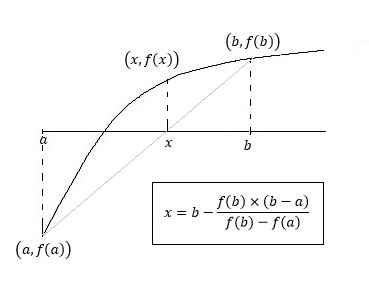


In [ ]:
import math
import pandas as pd

# Método de bisección
def biseccion(f, a, b, tol=1.0e-4):
    fa = f(a)
    if fa == 0.0:
        return a
    fb = f(b)
    if fb == 0.0:
        return b
    if fa*fb>0:
        raise ValueError('La raíz no está en el intervalo')

    izq_lista=[]
    der_lista=[]
    xm_lista=[]
    func_izq_lista=[]
    func_der_lista=[]
    func_xm_lista=[]

    errores_lista=[]

    # primera iteración
    xm = (a-(f(a)*(b-a))/(f(b)-f(a)))
    xm_ant=xm
    fxm = f(xm)

    izq_lista.append(a)
    der_lista.append(b)
    xm_lista.append(xm)
    func_izq_lista.append(fa)
    func_der_lista.append(fb)
    func_xm_lista.append(fxm)


    if fxm == 0.0:
        return xm  # Se encontró la raíz exacta

    # Verificar en qué subintervalo está la raíz si en el izquierdo o en el derecho
    if fa*fxm<0:
        a = a
        b = xm
        fa=f(a)
        fb=f(b)
    else:
        a = xm
        b = b
        fa=f(a)
        fb=f(b)

    #creo variables auxiliares
    error=1
    iteraciones=2

    errores_lista.append(error)

    # Proceso iterativo
    while error>tol:
        xm = (a-(f(a)*(b-a))/(f(b)-f(a)))
        fxm = f(xm)

        if fxm == 0.0:
            return xm  # Se encontró la raíz exacta

        # Verificar en qué subintervalo está la raíz si en el izquierdo o en el derecho
        if fa*fxm<0:
          a = a
          b = xm
          fa=f(a)
          fb=f(b)
        else:
          a = xm
          b = b
          fa=f(a)
          fb=f(b)

        error=abs(xm-xm_ant)
        xm_ant=xm


        #actualizar las listas
        izq_lista.append(a)
        der_lista.append(b)
        xm_lista.append(xm)
        func_izq_lista.append(fa)
        func_der_lista.append(fb)
        func_xm_lista.append(fxm)

        errores_lista.append(error)

        iteraciones=iteraciones+1
    # Retornar la aproximación final
    datos=pd.DataFrame({
    'a': izq_lista,
    'b': der_lista,
    'xm': xm_lista,
    'f(a)': func_izq_lista,
    'f(b)': func_der_lista,
    'f(xm)': func_xm_lista,
    'error': errores_lista
})
    return datos


def f(x):
  return  np.exp(-x**2+2)-x*np.sin(2*x-3)+1



biseccion(f, 1.5, 2.5)

,a,b,xm,f(a),f(b),f(xm),error
0,1.5,2.500000,2.085559,1.778801,-1.258979,-0.825778,1.000000
1,1.5,1.899909,1.899909,1.778801,-0.162712,-0.162712,0.185651
2,1.5,1.866394,1.866394,1.778801,-0.021653,-0.021653,0.033515
3,1.5,1.861987,1.861987,1.778801,-0.002702,-0.002702,0.004406
4,1.5,1.861438,1.861438,1.778801,-0.000334,-0.000334,0.000549
5,1.5,1.861370,1.861370,1.778801,-0.000041,-0.000041,0.000068


In [ ]:
import numpy as np

def metodo_biseccion(f, a, b, tolerancia=1.0e-4, max_iter=100, verbose=False):
    """
    Encuentra una raíz de la función f en el intervalo [a, b] usando el método de bisección.

    Parámetros:
    f (function): Función a evaluar
    a (float): Extremo izquierdo del intervalo
    b (float): Extremo derecho del intervalo
    tolerancia (float): Criterio de parada para el ancho del intervalo
    max_iter (int): Número máximo de iteraciones
    verbose (bool): Mostrar detalles de cada iteración

    Retorna:
    (float): Aproximación de la raíz
    (int): Número de iteraciones realizadas
    """

    # Verificar que el intervalo contenga una raíz
    if f(a) * f(b) >= 0:
        raise ValueError("La función no cambia de signo en el intervalo dado.")

    iteracion = 1
    historial = []  # Para almacenar el historial de iteraciones (opcional)

    # Algoritmo de bisección
    while (b - a) / 2 > tolerancia and iteracion < max_iter:
        c = (a-(f(a)*(b-a))/(f(b)-f(a)))
        historial.append((iteracion, a, b, c, f(c),f(a),f(b)))

        if verbose:
            print(f"Iter {iteracion}: a = {a:.6f}, b = {b:.6f}, c = {c:.6f}, f(c) = {f(c):.6f}, f(a) = {f(a):.6f}, f(b) = {f(b):.6f}")

        # Caso donde encontramos la raíz exacta
        if f(c) == 0:
            break

        # Actualizar intervalo
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iteracion += 1

    # La mejor aproximación es el punto medio final
    raiz = (a-(f(a)*(b-a))/(f(b)-f(a)))

    if verbose:
        print("\nResumen:")
        print(f"Raíz aproximada: {raiz:.8f}")
        print(f"Iteraciones realizadas: {iteracion}")
        print(f"Error estimado: {abs(b - a):.2e}")

    return raiz, iteracion, historial

# Ejemplo de uso
if __name__ == "__main__":
    # Definir la función y parámetros
    def f(x):
        return np.exp(-x**2+2)-x*np.sin(2*x-3)+1

    # Llamar al método
    raiz, iteraciones, historial= metodo_biseccion(f, 1.5, 2.5, tolerancia=1.0e-4, verbose=True)

    # Resultado final
    print("\n" + "="*50)
    print(f"Raíz encontrada: {raiz:.8f}")
    print(f"Valor de f(raíz): {f(raiz):.10f}")
    print(f"Iteraciones totales: {iteraciones}")
    print(historial)

Iter 1: a = 1.500000, b = 2.500000, c = 2.085559, f(c) = -0.825778, f(a) = 1.778801, f(b) = -1.258979
Iter 2: a = 1.500000, b = 2.085559, c = 1.899909, f(c) = -0.162712, f(a) = 1.778801, f(b) = -0.825778
Iter 3: a = 1.500000, b = 1.899909, c = 1.866394, f(c) = -0.021653, f(a) = 1.778801, f(b) = -0.162712
Iter 4: a = 1.500000, b = 1.866394, c = 1.861987, f(c) = -0.002702, f(a) = 1.778801, f(b) = -0.021653
Iter 5: a = 1.500000, b = 1.861987, c = 1.861438, f(c) = -0.000334, f(a) = 1.778801, f(b) = -0.002702
Iter 6: a = 1.500000, b = 1.861438, c = 1.861370, f(c) = -0.000041, f(a) = 1.778801, f(b) = -0.000334
Iter 7: a = 1.500000, b = 1.861370, c = 1.861362, f(c) = -0.000005, f(a) = 1.778801, f(b) = -0.000041
Iter 8: a = 1.500000, b = 1.861362, c = 1.861361, f(c) = -0.000001, f(a) = 1.778801, f(b) = -0.000005
Iter 9: a = 1.500000, b = 1.861361, c = 1.861361, f(c) = -0.000000, f(a) = 1.778801, f(b) = -0.000001
Iter 10: a = 1.500000, b = 1.861361, c = 1.861361, f(c) = -0.000000, f(a) = 1.7788

# **Clase n5**

1. Gradio
Propósito: Crear interfaces web interactivas para modelos de machine learning, scripts de Python, o cualquier función que quieras exponer visualmente.

Características:

Permite construir una interfaz con solo unas líneas de código (sliders, botones, campos de texto, etc.).

Ideal para compartir demos de IA, visualizar datos, o probar APIs.

2. Pyngrok
Propósito: Crear un túnel seguro para exponer un servidor local en internet mediante ngrok.

Características:

Genera una URL pública temporal (ej: https://abc123.ngrok.io) que redirige tráfico a tu aplicación local.

Es útil cuando trabajas en entornos sin IP pública (como Google Colab, Jupyter Notebooks, o tu computadora personal).

In [ ]:
!pip install pyngrok gradio

¿Por qué se instalan juntas?
Cuando usas Gradio para crear una aplicación (ej: un demo de un modelo de IA), esta corre localmente en tu máquina (por defecto en http://localhost:7860). Si quieres compartirla con alguien fuera de tu red local, pyngrok permite crear un enlace público para acceder a tu aplicación desde cualquier lugar.

Casos de uso comunes
Demo de modelos de IA: Compartir un modelo de ChatGPT, Stable Diffusion, o un clasificador de imágenes.

Testing remoto: Permitir que otros prueben una API o herramienta que estás desarrollando.

Presentaciones: Mostrar prototipos en tiempo real durante reuniones.

---

### Ejemplo

¿Qué hace?
Crea una función de saludo:

Recibe un nombre (ej: "Ana").

Retorna un mensaje personalizado (ej: "¡Hola, Ana!").

Construye una interfaz web:

inputs="text": Muestra un campo de texto para escribir el nombre.

outputs="text": Muestra el resultado en otro campo de texto.

Genera un enlace público:

Con share=True, Gradio crea automáticamente una URL pública (ej: https://12345.gradio.live).

No requiere ngrok (Gradio usa sus propios servidores para enrutar el tráfico).



In [ ]:
import gradio as gr

def saludar(nombre):
    return f"¡Hola, {nombre}!"

iface = gr.Interface(
    fn=saludar,     # Función a ejecutar
    inputs="text",  # Tipo de entrada (texto)
    outputs="text"  # Tipo de salida (texto)
)

iface.launch(share=True)  # Lanza la interfaz con enlace público

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3de6755aa61f3162e0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Ejemplo 2

Funcionalidades Clave
Método de Bisección:

Encuentra raíces de funciones en un intervalo [a, b].

Verifica que f(a) y f(b) tengan signos opuestos.

Detiene el proceso cuando se alcanza la tolerancia especificada.

Visualización Gráfica:

Genera un gráfico de la función con la raíz encontrada.

Incluye líneas de referencia y estilo profesional.

Interfaz Web con Gradio:

Entrada de función matemática (ej: x**3 - 2*x -5).

Campos para límites del intervalo y tolerancia.

Muestra resultados numéricos y gráficos.

In [ ]:
!pip install gradio numpy matplotlib sympy

import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def biseccion(func_str, a, b, tol):
    # Convertir la función ingresada en una expresión de sympy
    try:
        x = sp.symbols('x')
        func = sp.lambdify(x, sp.sympify(func_str), "numpy")
    except:
        return "Error: Función no válida", None

    # Verificar si los valores iniciales son válidos
    if func(a) * func(b) >= 0:
        return "El intervalo no es válido. f(a) y f(b) deben tener signos opuestos."

    if a >= b:
      return "Error: a debe ser menor que b", None
    if tol <= 0:
      return "Error: La tolerancia debe ser positiva", None

    iteraciones = []
    while abs(b - a) > tol:
        c = (a + b) / 2
        iteraciones.append((c, func(c)))

        if func(c) == 0 or abs(b - a) < tol:
            break
        elif func(a) * func(c) < 0:
            b = c
        else:
            a = c

    resultado = f"Raíz: {c:.6f}\nIteraciones: {len(iteraciones)}\nf(c) = {func(c):.6f}"

    # Crear la gráfica
    x_vals = np.linspace(a - 1, b + 1, 100)
    y_vals = func(x_vals)

    plt.xlim(min(a, b) - 0.5, max(a, b) + 0.5)  # Ajuste dinámico de rango
    plt.title("Método de Bisección")
    plt.scatter(c, func(c), color='red')  # Destacar punto raíz
    plt.figure(figsize=(6, 4))
    plt.plot(x_vals, y_vals, label=f"f(x) = {func_str}")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.axvline(c, color="red", linestyle="--", label=f"Raíz aproximada: {c:.6f}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()

    # Guardar la gráfica
    plt.savefig("biseccion.png")
    plt.close()

    return resultado, "biseccion.png"

# Crear la interfaz con Gradio
iface = gr.Interface(
    fn=biseccion,
    inputs=[
        gr.Textbox(label="Función (en términos de x, ejemplo: x**3 - x - 2)"),
        gr.Number(label="Límite inferior (a)"),
        gr.Number(label="Límite superior (b)"),
        gr.Number(label="Tolerancia", value=0.001),
    ],
    outputs=[gr.Label(label="Resultado"), gr.Image(label="Gráfica")],
    live=False,
    title="Método de Bisección",
    description="Ingrese una función matemática y un intervalo [a, b] para encontrar una raíz usando el método de bisección.",
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a5bbfe5a57ada66225.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Ejemplo 3


In [ ]:
!pip install gradio numpy matplotlib sympy

import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr

def biseccion(func_str, a, b, tol):
    try:
        # Configuración inicial
        x = sp.symbols('x')
        func = None
        iterations = []
        error_message = ""

        # Convertir la función ingresada
        try:
            expr = parse_expr(func_str, transformations='all', local_dict={'x': x})
            func = sp.lambdify(x, expr, modules=['numpy', {'sin': np.sin, 'cos': np.cos, 'exp': np.exp}])
        except Exception as e:
            return f"Error en la función: {str(e)}", None

        # Validación de parámetros
        if a >= b:
            return "Error: a debe ser menor que b", None

        if tol <= 0:
            return "Error: La tolerancia debe ser positiva", None

        fa, fb = func(a), func(b)

        # Verificar teorema de Bolzano
        if fa * fb >= 0:
            return f"Intervalo inválido. f({a}) = {fa:.2f}, f({b}) = {fb:.2f}", None

        # Algoritmo de bisección mejorado
        max_iter = 1000
        c = a
        for i in range(max_iter):
            c = (a + b) / 2
            fc = func(c)
            iterations.append((i+1, c, fc))

            if fc == 0 or (b - a)/2 < tol:
                break

            if fa * fc < 0:
                b = c
                fb = fc
            else:
                a = c
                fa = fc
        else:
            return "Máximo de iteraciones alcanzado", None

        # Generar gráfica profesional
        x_min = min(a, b) - 1
        x_max = max(a, b) + 1
        x_vals = np.linspace(x_min, x_max, 400)
        y_vals = func(x_vals)

        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, 'b-', lw=2, label=f'$f(x) = {sp.latex(expr)}$')
        plt.scatter(c, fc, color='red', s=100, zorder=5, label=f'Raíz: {c:.6f}')
        plt.axhline(0, color='black', lw=0.8)
        plt.axvline(c, color='green', ls='--', lw=1)
        plt.fill_betweenx(y_vals, a, b, color='lightblue', alpha=0.3)
        plt.title('Método de Bisección')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.tight_layout()
        plt.savefig("biseccion.png", dpi=150)
        plt.close()

        # Resultado detallado
        resultado = (
            f"Raíz encontrada: {c:.8f}\n"
            f"Valor de f(c): {fc:.2e}\n"
            f"Iteraciones: {len(iterations)}\n"
            f"Error estimado: {abs(b - a)/2:.2e}"
        )

        return resultado, "biseccion.png"

    except Exception as e:
        return f"Error inesperado: {str(e)}", None

# Interfaz mejorada
iface = gr.Interface(
    fn=biseccion,
    inputs=[
        gr.Textbox(label="Función", placeholder="Ej: x^3 + 2*x - exp(x)"),
        gr.Number(label="Límite inferior (a)", value=0.0),
        gr.Number(label="Límite superior (b)", value=2.0),
        gr.Slider(minimum=1e-10, maximum=1e-2, step=1e-5, label="Tolerancia", value=1e-4)
    ],
    outputs=[
        gr.Textbox(label="Resultado"),
        gr.Image(label="Gráfica", type="filepath")
    ],
    examples=[
        ["x**3 - x - 2", 1, 2, 0.0001],
        ["exp(-x) - cos(x)", 0, 2, 1e-5],
        ["x*sin(x) - 1", 0, 2, 1e-6]
    ],
    title="Método de Bisección Avanzado",
    description=(
        "Calcula raíces de funciones usando el método de bisección. "
        "Soporta funciones matemáticas comunes (sin, cos, exp, log, etc)."
    ),
    allow_flagging="never"
)

iface.launch(share=True)

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://890cfa17cdb96a3309.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Parcial n1


In [ ]:
!pip install gradio numpy matplotlib sympy

import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import pandas as pd

def root_finder(method, func_str, a, b, tol):
    try:
        # Configuración inicial
        x = sp.symbols('x')
        func = None
        iterations = []

        # Convertir la función ingresada
        try:
            expr = parse_expr(func_str, transformations='all', local_dict={'x': x})
            func = sp.lambdify(x, expr, modules=['numpy', {'sin': np.sin, 'cos': np.cos, 'exp': np.exp}])
        except Exception as e:
            return f"Error en la función: {str(e)}", None

        # Validación de parámetros
        if a >= b:
            return "Error: a debe ser menor que b", None

        if tol <= 0:
            return "Error: La tolerancia debe ser positiva", None

        fa, fb = func(a), func(b)

        # Verificar teorema de Bolzano
        if fa * fb >= 0:
            return f"Intervalo inválido. f({a}) = {fa:.2f}, f({b}) = {fb:.2f}", None

        # Algoritmo seleccionado
        max_iter = 1000
        c = a
        error = 1
        iteration_data = []

        if method == "Bisección":
            for i in range(max_iter):
                c = (a + b) / 2
                fc = func(c)
                error = abs(b - a)/2
                iteration_data.append([i+1, a, b, c, fa, fb, fc, error])

                if fc == 0 or error < tol:
                    break

                if fa * fc < 0:
                    b, fb = c, fc
                else:
                    a, fa = c, fc

        elif method == "Regla Falsa":
            c_ant = a
            for i in range(max_iter):
                c = (a*func(b) - b*func(a)) / (func(b) - func(a))
                fc = func(c)
                error = abs(c - c_ant)
                iteration_data.append([i+1, a, b, c, fa, fb, fc, error])

                if fc == 0 or error < tol:
                    break

                if fa * fc < 0:
                    b, fb = c, fc
                else:
                    a, fa = c, fc
                c_ant = c

        # Generar gráfica
        x_min = min(a, b) - 1
        x_max = max(a, b) + 1
        x_vals = np.linspace(x_min, x_max, 400)
        y_vals = func(x_vals)

        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, 'b-', lw=2, label=f'$f(x) = {sp.latex(expr)}$')
        plt.scatter(c, fc, color='red', s=100, zorder=5, label=f'Raíz: {c:.6f}')
        plt.axhline(0, color='black', lw=0.8)
        plt.axvline(c, color='green', ls='--', lw=1)
        plt.fill_betweenx(y_vals, a, b, color='lightblue', alpha=0.3)
        plt.title(f'Método de {method}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.tight_layout()
        plt.savefig("resultado.png", dpi=150)
        plt.close()

        # Crear tabla de iteraciones
        df = pd.DataFrame(iteration_data,
                        columns=['Iteración', 'a', 'b', 'c', 'f(a)', 'f(b)', 'f(c)', 'Error'])

        # Resultado detallado
        resultado = (
            f"Método: {method}\n"
            f"Raíz encontrada: {c:.8f}\n"
            f"Valor de f(c): {fc:.2e}\n"
            f"Iteraciones: {len(iteration_data)}\n"
            f"Error final: {error:.2e}\n\n"
            f"Últimas 5 iteraciones:\n{df.tail().to_string(index=False)}"
        )

        return resultado, "resultado.png"

    except Exception as e:
        return f"Error inesperado: {str(e)}", None

# Interfaz mejorada
iface = gr.Interface(
    fn=root_finder,
    inputs=[
        gr.Dropdown(["Bisección", "Regla Falsa"], label="Método", value="Bisección"),
        gr.Textbox(label="Función", placeholder="Ej: x^3 + 2*x - exp(x)"),
        gr.Number(label="Límite inferior (a)", value=0.0),
        gr.Number(label="Límite superior (b)", value=2.0),
        gr.Slider(minimum=1e-10, maximum=1e-2, step=1e-5, label="Tolerancia", value=1e-4)
    ],
    outputs=[
        gr.Textbox(label="Resultado"),
        gr.Image(label="Gráfica", type="filepath")
    ],
    examples=[
        ["Bisección", "x**3 - x - 2", 1, 2, 0.0001],
        ["Regla Falsa", "exp(-x) - cos(x)", 1, 2, 1e-5],
        ["Bisección", "x*sin(x) - 1", 0, 2, 1e-6],
        ["Regla Falsa", "exp(-x) - x", 0, 1, 0.001]
    ],
    title="Métodos Numéricos para Búsqueda de Raíces",
    description=(
        "Calcula raíces de funciones usando diferentes métodos numéricos.\n"
        "Soporta: Bisección y Regla Falsa\n"
        "Funciones permitidas: sin, cos, exp, log, etc."
    ),
    allow_flagging="never"
)

iface.launch(share=True)

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8a2365533b1259e392.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Metodo newton:


In [ ]:
# IA
import math

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Método de Newton-Raphson para encontrar raíces de una función

    Parámetros:
    f: función cuya raíz se busca
    df: derivada de la función f
    x0: estimación inicial
    tol: tolerancia (criterio de parada)
    max_iter: número máximo de iteraciones

    Retorna:
    x: aproximación de la raíz
    iteraciones: número de iteraciones realizadas
    """
    print("Iteración\t x\t\t f(x)")
    print("------------------------------------")

    for i in range(max_iter):
        fx = f(x0)
        print(f"{i}\t\t {x0:.6f}\t {fx:.6f}")

        if abs(fx) < tol:
            return x0, i

        dfx = df(x0)
        if dfx == 0:
            raise ValueError("Derivada cero. El método no puede continuar.")

        x1 = x0 - fx / dfx

        if abs(x1 - x0) < tol:
            return x1, i+1

        x0 = x1

    raise ValueError("El método no convergió después de {} iteraciones".format(max_iter))

# Definimos la función y su derivada
def f(x):
    return math.exp(-x) - x

def df(x):
    return -math.exp(-x) - 1

# Aplicamos el método
try:
    x0 = 1.0  # Estimación inicial
    raiz, iteraciones = newton_raphson(f, df, x0)
    print("\nLa raíz encontrada es:", raiz)
    print("Número de iteraciones:", iteraciones)
    print("f(raíz) =", f(raiz))
except ValueError as e:
    print(e)

Iteración	 x		 f(x)
------------------------------------
0		 1.000000	 -0.632121
1		 0.537883	 0.046100
2		 0.566987	 0.000245
3		 0.567143	 0.000000

La raíz encontrada es: 0.567143285989123
Número de iteraciones: 3
f(raíz) = 6.927808993140161e-09


In [ ]:
# Clase
import math
import numpy
from numpy import sign
def newton(f, df, x0, tol=1e-4, max_iter=100):
  x = x0
  iter_count = 0
  error=1
  while error > tol and iter_count < max_iter:
    x_ant=x
    x = x - f(x) / df(x)
    iter_count += 1
    error=abs(x-x_ant)
  if iter_count == max_iter:
    print("El método de Newton no convergió después de", max_iter,
  "iteraciones.")
  return x, iter_count
# Ejemplo de uso:
def f(x):
  return math.exp(-x)-x # Ecuación x^2 - 4 = 0 tiene soluciones en ±2
def df(x):
  return -math.exp(-x)-1
inicial = 200.0
raiz_aprox = newton(f, df, inicial)
print("Aproximación de la raíz:", raiz_aprox)

Aproximación de la raíz: (0.5671432904097811, 5)


In [ ]:
!pip install gradio numpy matplotlib sympy

import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import pandas as pd

def root_finder(method, func_str, a, b, tol):
    try:
        x = sp.symbols('x')

        # Parsear función y calcular derivada
        expr = parse_expr(func_str, transformations='all', local_dict={'x': x})
        f = sp.lambdify(x, expr, modules=['numpy',
               {'sin': np.sin, 'cos': np.cos, 'exp': np.exp, 'log': np.log}])
        df_expr = sp.diff(expr, x)
        df = sp.lambdify(x, df_expr, modules=['numpy',
               {'sin': np.sin, 'cos': np.cos, 'exp': np.exp, 'log': np.log}])

        iteration_data = []
        root = None

        if method == "Newton-Raphson":
            x0 = a
            for i in range(100):
                fx = f(x0)
                dfx = df(x0)

                iteration_data.append([i+1, x0, fx, dfx, abs(fx)])

                if dfx == 0:
                    raise ValueError("Derivada cero en iteración {}".format(i+1))

                x1 = x0 - fx/dfx
                if abs(x1 - x0) < tol:
                    root = x1
                    break
                x0 = x1
            else:
                raise ValueError("No convergió en 100 iteraciones")

        else:
            if a >= b:
                raise ValueError("a debe ser menor que b")

            fa, fb = f(a), f(b)
            if fa * fb >= 0:
                raise ValueError(f"Intervalo inválido. f({a}) = {fa:.2f}, f({b}) = {fb:.2f}")

            if method == "Bisección":
                c, error = a, b-a
                for i in range(100):
                    c = (a + b)/2
                    fc = f(c)
                    error = abs(b - a)/2
                    iteration_data.append([i+1, a, b, c, fa, fb, fc, error])

                    if fc == 0 or error < tol:
                        root = c
                        break

                    if fa * fc < 0:
                        b, fb = c, fc
                    else:
                        a, fa = c, fc

            elif method == "Regla Falsa":
                c_ant = a
                for i in range(100):
                    c = (a*f(b) - b*f(a))/(f(b) - f(a))
                    fc = f(c)
                    error = abs(c - c_ant)
                    iteration_data.append([i+1, a, b, c, fa, fb, fc, error])

                    if fc == 0 or error < tol:
                        root = c
                        break

                    if fa * fc < 0:
                        b, fb = c, fc
                    else:
                        a, fa = c, fc
                    c_ant = c

        # Configuración del gráfico después de encontrar la raíz
        plt.figure(figsize=(10, 6))
        x_vals = np.linspace(root-1, root+1, 400)
        y_vals = f(x_vals)
        plt.plot(x_vals, y_vals, 'b-', lw=2, label=f'$f(x) = {sp.latex(expr)}$')
        plt.axhline(0, color='black', lw=0.8)
        plt.grid(True, linestyle=':')

        # Elementos específicos del método
        if method == "Newton-Raphson":
            for n, data in enumerate(iteration_data[-3:]):
                _, xi, fxi, dfxi, _ = data
                tangent = fxi + dfxi*(x_vals - xi)
                plt.plot(x_vals, tangent, '--', alpha=0.5, label=f'T_{n+1}' if n < 2 else None)
        else:
            current_a = iteration_data[-1][1]
            current_b = iteration_data[-1][2]
            plt.fill_betweenx(y_vals, current_a, current_b, color='lightblue', alpha=0.3)

        # Elementos comunes
        plt.scatter(root, f(root), color='red', s=100, zorder=5,
                   label=f'Raíz: {root:.6f}')
        plt.axvline(root, color='green', ls='--', lw=1)
        plt.legend()
        plt.title(f'Método de {method}')
        plt.xlim(root-1, root+1)
        plt.tight_layout()
        plt.savefig("plot.png")
        plt.close()

        # Crear tabla de resultados
        columns = ['Iter', 'x/a', 'f(x)/f(a)', "f'(x)/f(b)", 'Error'] if method == "Newton-Raphson" else \
                 ['Iter', 'a', 'b', 'c', 'f(a)', 'f(b)', 'f(c)', 'Error']

        df_results = pd.DataFrame(iteration_data, columns=columns)
        last_5 = df_results.tail().to_string(index=False, float_format=lambda x: f"{x:.4e}")

        resultado = (
            f"Método: {method}\nRaíz: {root:.8f}\n"
            f"f(raíz) = {f(root):.2e}\nIteraciones: {len(iteration_data)}\n"
            f"Error final: {iteration_data[-1][-1]:.2e}\n\n"
            f"Últimas 5 iteraciones:\n{last_5}"
        )

        return resultado, "plot.png"

    except Exception as e:
        return f"Error: {str(e)}", None

def update_inputs(method):
    is_newton = (method == "Newton-Raphson")
    return [
        gr.Number.update(
            label="Valor inicial" if is_newton else "Límite inferior a",
            # Mantener el valor existente, solo cambiar etiqueta
        ),
        gr.Number.update(
            visible=not is_newton,
            interactive=not is_newton,
            # Mantener el valor pero ocultar el campo
            label="Límite superior b"
        )
    ]

with gr.Blocks() as app:
    gr.Markdown("# 🔄 Calculadora de Raíces Avanzada")
    gr.Markdown("Sistema interactivo con validación en tiempo real")

    with gr.Row():
        with gr.Column():
            method = gr.Dropdown(
                ["Bisección", "Regla Falsa", "Newton-Raphson"],
                label="Método", value="Bisección"
            )
            func_str = gr.Textbox(label="Función f(x)", placeholder="Ej: exp(-x) - x")
            a = gr.Number(label="Límite inferior a", value=0.0)
            b = gr.Number(label="Límite superior b", value=1.0, visible=True)
            tol = gr.Slider(minimum=1e-10, maximum=1e-2, step=1e-5,
                          label="Tolerancia", value=1e-6)
            submit_btn = gr.Button("Calcular", variant="primary")

        with gr.Column():
            result_text = gr.Textbox(label="Resultados", interactive=False)
            plot = gr.Image(label="Visualización", type="filepath")

    examples = gr.Examples(
        examples=[
            ["Newton-Raphson", "exp(-x) - x", 0.5, 0, 1e-6],
            ["Bisección", "x^3 - x - 2", 1, 2, 1e-4],
            ["Regla Falsa", "x*cos(x) - log(x)", 1, 2, 1e-5]
        ],
        inputs=[method, func_str, a, b, tol],
        fn=update_inputs,  # Added fn to trigger update
        outputs=[a, b]
    )

    # Eventos
    method.change(
        fn=update_inputs,
        inputs=method,
        outputs=[a, b],
        queue=False  # Added for immediate update
    )

    # Trigger initial update
    app.load(
        fn=lambda: update_inputs("Bisección"),
        outputs=[a, b]
    )

    submit_btn.click(
        fn=root_finder,
        inputs=[method, func_str, a, b, tol],
        outputs=[result_text, plot],
        api_name="calcular"
    )

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cd489215507727cb50.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
